In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [61]:
img_height=230
img_width=230
batch_size=32

In [62]:
train_ds=tf.keras.utils.image_dataset_from_directory(
'natural_images',
validation_split=0.2,
subset='training',
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size
)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [63]:
val_ds=tf.keras.utils.image_dataset_from_directory(
'natural_images',
validation_split=0.2,
subset='validation',
seed=123,
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [64]:
class_names=train_ds.class_names
class_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

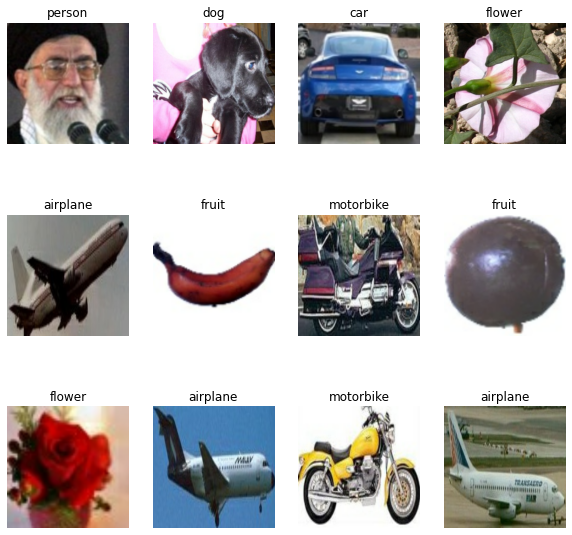

In [65]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [66]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 230, 230, 3)
(32,)


In [67]:
image_batch.numpy()

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.26616848e+00, 3.26616836e+00, 2.66168475e-01],
         [8.95067096e-01, 2.37847400e+00, 4.11660135e-01],
         [1.86303079e+00, 1.89756715e+00, 1.85242021e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [2.35870361e+00, 4.11956787e+00, 1.23913574e+00],
         [7.56947935e-01, 2.75694799e+00, 3.78473967e-01],
         [9.91886020e-01, 1.03973758e+00, 7.90591072e-03]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [9.50394452e-01, 2.02222490e+00, 5.19860268e-01],
         [

In [68]:
labels_batch.numpy()

array([4, 0, 2, 6, 6, 4, 0, 4, 7, 1, 6, 6, 2, 2, 7, 1, 7, 4, 5, 7, 5, 3,
       7, 1, 5, 2, 2, 7, 3, 4, 7, 4])

In [69]:

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(8)
])

In [70]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [71]:
history=model.fit(
train_ds,
validation_data=val_ds,
epochs=10)

Epoch 1/10
173/173 [==============================] - 38s 199ms/step - loss: 0.6643 - accuracy: 0.7611 - val_loss: 0.3328 - val_accuracy: 0.8738
Epoch 2/10
173/173 [==============================] - 33s 188ms/step - loss: 0.2493 - accuracy: 0.9063 - val_loss: 0.2976 - val_accuracy: 0.8905
Epoch 3/10
173/173 [==============================] - 33s 191ms/step - loss: 0.1374 - accuracy: 0.9475 - val_loss: 0.2995 - val_accuracy: 0.8985
Epoch 4/10
173/173 [==============================] - 27s 152ms/step - loss: 0.0817 - accuracy: 0.9705 - val_loss: 0.3585 - val_accuracy: 0.8869
Epoch 5/10
173/173 [==============================] - 11s 66ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.4307 - val_accuracy: 0.8876
Epoch 6/10
173/173 [==============================] - 11s 66ms/step - loss: 0.0588 - accuracy: 0.9797 - val_loss: 0.3430 - val_accuracy: 0.9028
Epoch 7/10
173/173 [==============================] - 12s 68ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.4097 - val_accur

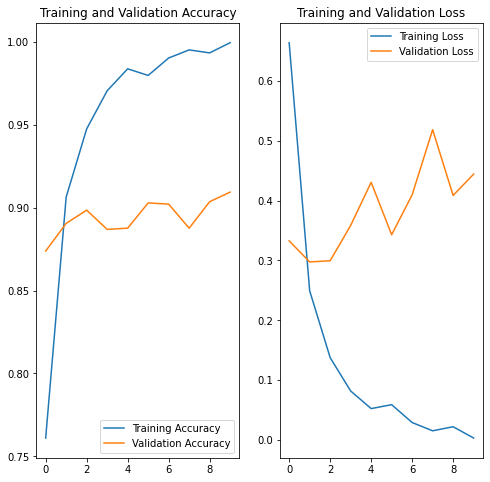

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

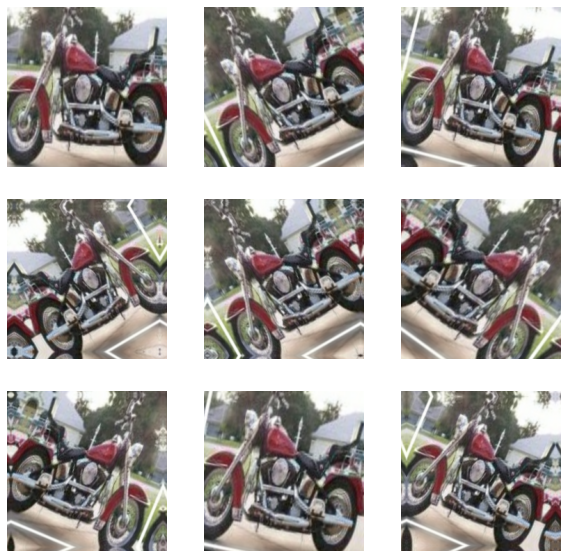

In [74]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [75]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(8)
])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 230, 230, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 230, 230, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 115, 115, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 115, 115, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 57, 57, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 57, 57, 64)       

In [78]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
173/173 [==============================] - 15s 78ms/step - loss: 0.9884 - accuracy: 0.6502 - val_loss: 0.4527 - val_accuracy: 0.8267
Epoch 2/10
173/173 [==============================] - 13s 75ms/step - loss: 0.4785 - accuracy: 0.8226 - val_loss: 0.4600 - val_accuracy: 0.8354
Epoch 3/10
173/173 [==============================] - 13s 75ms/step - loss: 0.3752 - accuracy: 0.8612 - val_loss: 0.3341 - val_accuracy: 0.8796
Epoch 4/10
173/173 [==============================] - 13s 74ms/step - loss: 0.3214 - accuracy: 0.8837 - val_loss: 0.2710 - val_accuracy: 0.8999
Epoch 5/10
173/173 [==============================] - 13s 74ms/step - loss: 0.2820 - accuracy: 0.8982 - val_loss: 0.2622 - val_accuracy: 0.9057
Epoch 6/10
173/173 [==============================] - 13s 75ms/step - loss: 0.2615 - accuracy: 0.9029 - val_loss: 0.2904 - val_accuracy: 0.8934
Epoch 7/10
173/173 [==============================] - 13s 75ms/step - loss: 0.2173 - accuracy: 0.9196 - val_loss: 0.2387 - val_accuracy:

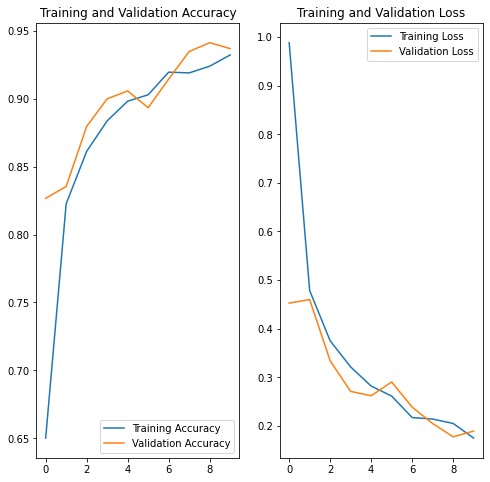

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to airplane with a 95.21 percent confidence.


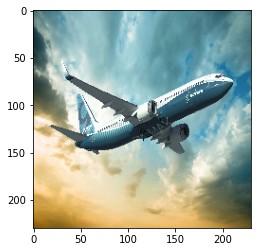

In [81]:
img = tf.keras.utils.load_img(
    "1.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [82]:
model.save("natural_images_model.h5")